In [4]:
import numpy as np
from concreteproperties.material import Concrete, SteelBar, SteelStrand
from concreteproperties.stress_strain_profile import (
    ConcreteLinear,
    RectangularStressBlock,
    SteelElasticPlastic,
    StrandProfile,
)
from sectionproperties.pre.library.primitive_sections import rectangular_section
from concreteproperties.pre import add_bar, add_bar_rectangular_array
from concreteproperties.concrete_section import PrestressedSection

In [5]:
concrete = Concrete(
    name="40 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinear(elastic_modulus=30e3),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=40,
        alpha=0.79,
        gamma=0.87,
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=3.8,
    colour="lightgrey",
)

steel = SteelBar(
    name="500 MPa Steel",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=500,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

strand = SteelStrand(
    name="1830 MPa Strand",
    density=7.85e-6,
    stress_strain_profile=StrandProfile(
        yield_strength=1500,
        elastic_modulus=200e3,
        fracture_strain=0.035,
        breaking_strength=1830,
    ),
    colour="slategrey",
    prestress_force=1350e3,
)

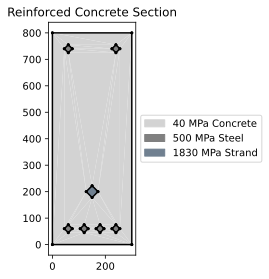

<AxesSubplot: title={'center': 'Reinforced Concrete Section'}>

In [6]:
geom = rectangular_section(d=800, b=300, material=concrete)

# add top steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=450, material=steel, n_x=2, x_s=180, anchor=(60, 740)
)

# add bottom steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=450, material=steel, n_x=4, x_s=60, anchor=(60, 60)
)

# add prestressing strand
geom = add_bar(
    geometry=geom,
    area=986,
    material=strand,
    x=150,
    y=200,
)

conc_sec = PrestressedSection(geometry=geom)
conc_sec.plot_section()

In [7]:
gross_props = conc_sec.get_gross_properties()
gross_props.print_results(fmt=".3e")

    Gross Concrete Section Properties     
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Property                  ┃      Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Total Area                │  2.410e+05 │
│ Concrete Area             │  2.363e+05 │
│ Lumped Reinforcement Area │  3.686e+03 │
│ Strand Area               │  9.860e+02 │
│ Axial Rigidity (EA)       │  8.024e+09 │
│ Mass (per unit length)    │  6.038e-01 │
│ Perimeter                 │  2.200e+03 │
│ E.Qx                      │  3.085e+12 │
│ E.Qy                      │  1.204e+12 │
│ x-Centroid                │  1.500e+02 │
│ y-Centroid                │  3.844e+02 │
│ E.Ixx_g                   │  1.636e+15 │
│ E.Iyy_g                   │  2.372e+14 │
│ E.Ixy_g                   │  4.627e+14 │
│ E.Ixx_c                   │  4.498e+14 │
│ E.Iyy_c                   │  5.666e+13 │
│ E.Ixy_c                   │  0.000e+00 │
│ E.I11                     │  4.498e+14 │
│ E.I22                     │  5.666e+13 │
│ Principal Axis Angle      │  0.000e+00 │
│ E.Zxx+                    │  1.082e+12 │
│ E.Zxx-                    │  1.170e+12 │
│ E.Zyy+                    │  3.777e+11 │
│ E.Zyy-                    │  3.777e+11 │
│ E.Z11+                    │  1.082e+12 │
│ E.Z11-                    │  1.170e+12 │
│ E.Z22+                    │  3.777e+11 │
│ E.Z22-                    │  3.777e+11 │
│ Ultimate Concrete Strain  │  3.000e-03 │
│ n_prestress               │  1.350e+06 │
│ m_prestress               │ -2.490e+08 │
└───────────────────────────┴────────────┘

In [8]:
transformed_props = conc_sec.get_transformed_gross_properties(elastic_modulus=32.8e3)
transformed_props.print_results(fmt=".3e")

   Transformed Gross    
    Concrete Section    
       Properties       
┏━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Property ┃     Value ┃
┡━━━━━━━━━━╇━━━━━━━━━━━┩
│ E_ref    │ 3.280e+04 │
│ Area     │ 2.446e+05 │
│ Qx       │ 9.404e+07 │
│ Qy       │ 3.669e+07 │
│ Ixx_g    │ 4.986e+10 │
│ Iyy_g    │ 7.232e+09 │
│ Ixy_g    │ 1.411e+10 │
│ Ixx_c    │ 1.371e+10 │
│ Iyy_c    │ 1.727e+09 │
│ Ixy_c    │ 0.000e+00 │
│ I11      │ 1.371e+10 │
│ I22      │ 1.727e+09 │
│ Zxx+     │ 3.299e+07 │
│ Zxx-     │ 3.567e+07 │
│ Zyy+     │ 1.152e+07 │
│ Zyy-     │ 1.152e+07 │
│ Z11+     │ 3.299e+07 │
│ Z11-     │ 3.567e+07 │
│ Z22+     │ 1.152e+07 │
│ Z22-     │ 1.152e+07 │
└──────────┴───────────┘

In [9]:
print(strand.get_prestress_strain(area=986))

0.006845841784989857


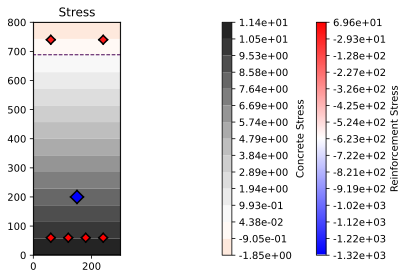

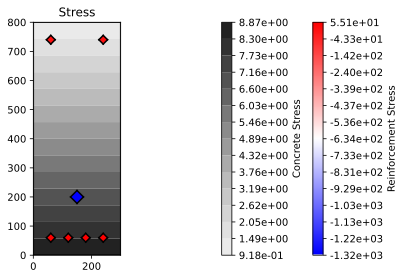

<AxesSubplot: title={'center': 'Stress'}>

In [14]:
res_ps = conc_sec.calculate_uncracked_stress()
res_final = conc_sec.calculate_uncracked_stress(m=100e6)
res_ps.plot_stress()
res_final.plot_stress()

In [12]:
from rich.pretty import pprint

pprint(res_final)

StressResult(
│   concrete_section=<concreteproperties.concrete_section.PrestressedSection object at 0x000001CDB3489070>,
│   concrete_analysis_sections=[
│   │   <concreteproperties.analysis_section.AnalysisSection object at 0x000001CDB33EA400>
│   ],
│   concrete_stresses=[
│   │   array([8.86746007, 8.86746007, 0.91791462, 0.91791462, 1.66318451,
│      1.51413053, 1.36507655, 1.51413053, 1.51413053, 1.66318451,
│      1.51413053, 1.36507655, 8.12219019, 8.27124416, 8.42029814,
│      8.27124416, 8.27124416, 8.12219019, 8.27124416, 8.42029814,
│      8.42029814, 8.27124416, 8.12219019, 8.27124416, 8.27124416,
│      8.42029814, 8.27124416, 8.12219019, 6.65943802, 6.88007371,
│      7.1007094 , 6.88007371])
│   ],
│   concrete_forces=[(1151210.253697283, 7.637096138487332e-14, -89.73471409529012)],
│   meshed_reinforcement_sections=[],
│   meshed_reinforcement_stresses=[],
│   meshed_reinforcement_forces=[],
│   lumped_reinforcement_geometries=[
│   │   <concreteproperties.pre.CPGeom object at 0x000001CDF405F850>,
│   │   <concreteproperties.pre.CPGeom object at 0x000001CDF4121190>,
│   │   <concreteproperties.pre.CPGeom object at 0x000001CDF4121160>,
│   │   <concreteproperties.pre.CPGeom object at 0x000001CDB55A1100>,
│   │   <concreteproperties.pre.CPGeom object at 0x000001CDB55A1070>,
│   │   <concreteproperties.pre.CPGeom object at 0x000001CDB55A1130>
│   ],
│   lumped_reinforcement_stresses=[
│   │   10.09420353014431,
│   │   10.09420353014431,
│   │   55.14162775626505,
│   │   55.14162775626505,
│   │   55.14162775626505,
│   │   55.14162775626505
│   ],
│   lumped_reinforcement_strains=[
│   │   5.047101765072155e-05,
│   │   5.047101765072155e-05,
│   │   0.00027570813878132524,
│   │   0.00027570813878132524,
│   │   0.00027570813878132524,
│   │   0.00027570813878132524
│   ],
│   lumped_reinforcement_forces=[
│   │   (4542.391588564939, -89.99999999999994, 355.57662037709713),
│   │   (4542.391588564939, 90.00000000000006, 355.57662037709713),
│   │   (24813.732490319275, -89.99999999999994, -324.42337962290287),
│   │   (24813.732490319275, -29.999999999999943, -324.42337962290287),
│   │   (24813.732490319275, 30.000000000000057, -324.42337962290287),
│   │   (24813.732490319275, 90.00000000000006, -324.42337962290287)
│   ],
│   strand_geometries=[
│   │   <concreteproperties.pre.CPGeom object at 0x000001CDB55A1280>,
│   │   <concreteproperties.pre.CPGeom object at 0x000001CDB55A1220>
│   ],
│   strand_stresses=[-1323.301237312003, -1323.301237312003],
│   strand_strains=[-0.006616506186560015, -0.006616506186560015],
│   strand_forces=[
│   │   (-1304774.983417846, 2.842170943040401e-14, -184.42337962290284),
│   │   (-1304774.983417846, 2.842170943040401e-14, -184.42337962290284)
│   ]
)